In [1]:
import MyLibrary.phantom as ph
import MyLibrary.RayTransform as RT

import numpy as np
import matplotlib.pyplot as plt

## Fanbeam with ring detectors

This geometry can be selected with the attribute <code>modality  = 'fanbeam-ring'</code>. Here the detector set is assumed to be a circle/arc and the center of rotation of the scanner has to coincide with the center of the aforementioned circle.  The source is located arbitrarily on the axis O$y$.

The parameters of the system are therefore $\varphi$, the rotation angle, and $\alpha$ the angle between the detector and the axis O$y$.


To switch back the fanbeam geometry to parallel beams requires the following relationship regarding the detector position:
$$
\alpha = \arcsin\frac{p}{OS} + \arcsin\frac{p}{OD} \quad \text{and} \quad
p = \frac{OS \cdot OD \cdot \sin \alpha}{\sqrt{OS^2+OD^2+2 OS \cdot OD \cdot \cos \alpha}}.
$$

<img src="./Images/CTscan_fanbeam_ring.png" alt="" width="400" height="400"/>


In [2]:
#Parameters of the CT-scan
modality       = 'fanbeam-ring'
N              = 50
Nrota          = 2*N
Ndetector      = 2*N
center         = [N/2,N/2]
distOS         = 1.5*N
distOD         = N/np.sqrt(2)
param_detector = -np.pi/2 + np.pi*np.arange(0,1,1/Ndetector)   
param_rota     = min(param_detector) + (max(param_detector)+np.pi - min(param_detector))*np.arange(0,Nrota)/(Nrota-1) 
parameters     = (param_detector,param_rota,N,center,distOS,distOD)

In [3]:
#Selection of the phantom
f0 = ph.phantom(N)

In [4]:
#Computation of the projection matrix and data
Xring = RT.RayTransform(parameters,modality=modality)     
Xring.computeProjectionMatrix(method='gaussian')
gring = Xring.getData(f0) 

Projection Matrix: [##########]100%  Time elapsed: 1.8 seconds


In [5]:
#Switch to the parallel geometry
p              = -N/2 + N*np.arange(0,1,1/Ndetector)
dp             = p[1] - p[0]
phi            = np.arange(0,Nrota)*np.pi/(Nrota-1) 
gring2para     = Xring.switchfanbeam2parallel(gring,(p,phi))
new_parameters = (p,phi,N,center)
R              = RT.RayTransform(new_parameters,modality = 'parallel')
gRT            = R.RadonTransform(f0)

Fanbeam --> Parallel: [##########]100%  Time elapsed: 0.1 seconds
Line integrals: [##########]100%  Time elapsed: 2.1 seconds


In [6]:
#Computation of the FBP and Approximate inverse
fFBP_ring2para = R.FBP(gring2para)
fAI_ring       = Xring.ApproximateInverseRT(gring,gamma=dp)

FBP: [##########]100%  Time elapsed: 0.0 seconds
ApproxInverse: [##########]100%  Time elapsed: 0.3 seconds


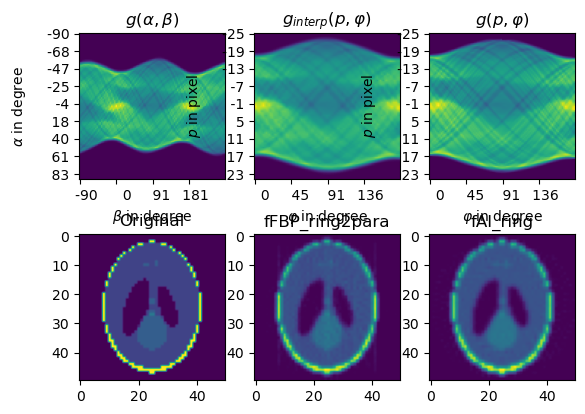

In [7]:
#Visualisation of the data and reconstructions
fig, axs = plt.subplots(2, 3, num=1)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 10})

xticks = np.arange(0,Nrota,int(Nrota/4))
xticklabels = ["{:6.0f}".format(i) for i in 180/np.pi*param_rota[xticks]]
yticks = np.arange(0,Ndetector,int(Ndetector/8))
yticklabels = ["{:6.0f}".format(i) for i in 180/np.pi*param_detector[yticks]]

axs[0,0].imshow(gring)
axs[0,0].set_xticks(xticks)
axs[0,0].set_xticklabels(xticklabels)
axs[0,0].set_yticks(yticks)
axs[0,0].set_yticklabels(yticklabels)
axs[0,0].set(xlabel=r'$\beta$ in degree', ylabel=r'$\alpha$ in degree',title=r'$g(\alpha,\beta)$')

xticks = np.arange(0,Nrota,int(Nrota/4))
xticklabels = ["{:6.0f}".format(i) for i in 180/np.pi*phi[xticks]]
yticks = np.arange(0,Ndetector,int(Ndetector/8))
yticklabels = ["{:6.0f}".format(i) for i in p[yticks]]

axs[0,1].imshow(gring2para)
axs[0,1].set_xticks(xticks)
axs[0,1].set_xticklabels(xticklabels)
axs[0,1].set_yticks(yticks)
axs[0,1].set_yticklabels(yticklabels)
axs[0,1].set(xlabel=r'$\varphi$ in degree', ylabel=r'$p$ in pixel',title=r'$g_{interp}(p,\varphi)$')

axs[0,2].imshow(gRT)
axs[0,2].set_xticks(xticks)
axs[0,2].set_xticklabels(xticklabels)
axs[0,2].set_yticks(yticks)
axs[0,2].set_yticklabels(yticklabels)
axs[0,2].set(xlabel=r'$\varphi$ in degree', ylabel=r'$p$ in pixel',title=r'$g(p,\varphi)$')



axs[1,0].imshow(f0)
axs[1,0].set_title('Original')
axs[1,1].imshow(fFBP_ring2para)
axs[1,1].set_title('fFBP_ring2para')
axs[1,2].imshow(fAI_ring)
axs[1,2].set_title('fAI_ring')

plt.show()